In [41]:
import torch

try:
    import google.colab
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Make use of a GPU or MPS (Apple) if one is available.  (see module 3.2)
import torch
has_mps = torch.backends.mps.is_built()
device = "mps" if has_mps else "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Note: not using Google CoLab
Using device: cpu


In [42]:
import pandas as pd
import urllib.request
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Set Pandas display options
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 5)

# Download the file using urllib
# Download the file using urllib
# url = 'https://github.com/jeffheaton/jheaton-ds2/rawmain/kdd-with-columns.csv'
#filename = 'DMZServiciosN4_Web_U_EX240225.log'
filename = 'data/DMZServiciosN4_Web_U_EX240225.log'

if not os.path.isfile(filename):
        print('documento no encontrado :' + filename)
    
print(filename)
columnanombre = 'No cargo aun el archivo'
# Cargo titulos de columnas
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#Fields:'):
            # Eliminar el prefijo y el salto de línea, luego dividir por espacio
            columnanombre = line.replace('#Fields: ', '').strip().split()
            break

print(columnanombre)


# Se cargan los datos con las columnas a utilizar
cols_to_use = ['time', 'cs-method', 'cs-uri-stem', 'cs-username','c-ip','cs-host','sc-status'
                                                         ,'sc-bytes','cs-bytes','time-taken']
#df = pd.read_csv(filename, sep=' ', names=columnanombre, comment='#',usecols=cols_to_use)

df = pd.read_csv(filename, sep=' ', names=columnanombre, comment='#')
print("Read {} rows.".format(len(df)))

# Display 5 rows
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 15)
              
print(df)

data/DMZServiciosN4_Web_U_EX240225.log
['date', 'time', 's-computername', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)', 'cs-host', 'sc-status', 'sc-substatus', 'sc-win32-status', 'sc-bytes', 'cs-bytes', 'time-taken']
Read 232076 rows.
              date      time s-computername            s-ip cs-method  \
0       2024-02-25  00:00:00          WebV8  172.20.198.108      POST   
1       2024-02-25  00:00:00          WebV8  172.20.198.108       GET   
2       2024-02-25  00:00:00          WebV8  172.20.198.108      POST   
3       2024-02-25  00:00:00          WebV8  172.20.198.108      POST   
4       2024-02-25  00:00:01          WebV8  172.20.198.108      POST   
...            ...       ...            ...             ...       ...   
232071  2024-02-25  23:59:56          WebV8  172.20.198.108       GET   
232072  2024-02-25  23:59:56          WebV8  172.20.198.108      POST   
232073  2024-02-25  23:59:58        

In [43]:
#Estructura de datos

In [44]:
df.head()

,date,time,s-computername,s-ip,cs-method,cs-uri-stem,cs-uri-query,...,cs-host,sc-status,sc-substatus,sc-win32-status,sc-bytes,cs-bytes,time-taken
0,2024-02-25,00:00:00,WebV8,172.20.198.108,POST,/LuciaWS/awsdua.aspx,-,...,servicios.aduanas.gub.uy,200,0,0,3397,702,298
1,2024-02-25,00:00:00,WebV8,172.20.198.108,GET,/luciaws/axmovstkxml.aspx,"1644,6172478%20%20%20%20%20%20%20%20,2024,ENT",...,servicios.aduanas.gub.uy,200,0,0,1813,800,189
2,2024-02-25,00:00:00,WebV8,172.20.198.108,POST,/LuciaWSPR/aWSPrcRptV2.aspx,-,...,servicios.aduanas.gub.uy,401,2,5,1621,1007,0
3,2024-02-25,00:00:00,WebV8,172.20.198.108,POST,/LuciaWSPR/aWSPrcRptV2.aspx,-,...,servicios.aduanas.gub.uy,200,0,0,1093,1070,187
4,2024-02-25,00:00:01,WebV8,172.20.198.108,POST,/LuciaWsPr/awsprcrpt.aspx,-,...,servicios.aduanas.gub.uy,200,0,0,1093,879,109


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232076 entries, 0 to 232075
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   date             232076 non-null  object
 1   time             232076 non-null  object
 2   s-computername   232076 non-null  object
 3   s-ip             232076 non-null  object
 4   cs-method        232076 non-null  object
 5   cs-uri-stem      232076 non-null  object
 6   cs-uri-query     232076 non-null  object
 7   s-port           232076 non-null  int64 
 8   cs-username      232076 non-null  object
 9   c-ip             232076 non-null  object
 10  cs(User-Agent)   232076 non-null  object
 11  cs(Referer)      232076 non-null  object
 12  cs-host          232076 non-null  object
 13  sc-status        232076 non-null  int64 
 14  sc-substatus     232076 non-null  int64 
 15  sc-win32-status  232076 non-null  int64 
 16  sc-bytes         232076 non-null  int64 
 17  cs-bytes  

In [46]:
df.describe()

,s-port,sc-status,sc-substatus,sc-win32-status,sc-bytes,cs-bytes,time-taken
count,232076.0,232076.000000,232076.000000,232076.000000,2.320760e+05,232076.000000,232076.000000
mean,443.0,253.742520,0.522570,20.486509,9.092525e+03,1092.678243,288.523932
std,0.0,88.962958,1.358768,158.566301,9.348518e+04,3920.716770,1861.082983
min,443.0,200.000000,0.000000,0.000000,0.000000e+00,68.000000,0.000000
25%,443.0,200.000000,0.000000,0.000000,1.093000e+03,618.000000,15.000000
50%,443.0,200.000000,0.000000,0.000000,1.621000e+03,879.000000,109.000000
75%,443.0,401.000000,2.000000,5.000000,1.621000e+03,1007.000000,159.000000
max,443.0,500.000000,503.000000,1909.000000,2.150911e+06,659778.000000,119879.000000


In [47]:
df.isnull().sum()

date               0
time               0
s-computername     0
s-ip               0
cs-method          0
                  ..
sc-substatus       0
sc-win32-status    0
sc-bytes           0
cs-bytes           0
time-taken         0
Length: 19, dtype: int64

In [48]:
# Reviso y elimino nulos
filas_con_nulos = df[df.isnull().any(axis=1)]

In [49]:
# Elimino filas con datos nulos.
df = df.dropna(axis=0)


In [50]:
#Eliminar las filas cuyo estatus sea 500 o 429 pq son errores a estudiar
df = df[df['sc-status'] != 500]
df = df[df['sc-status'] != 429]

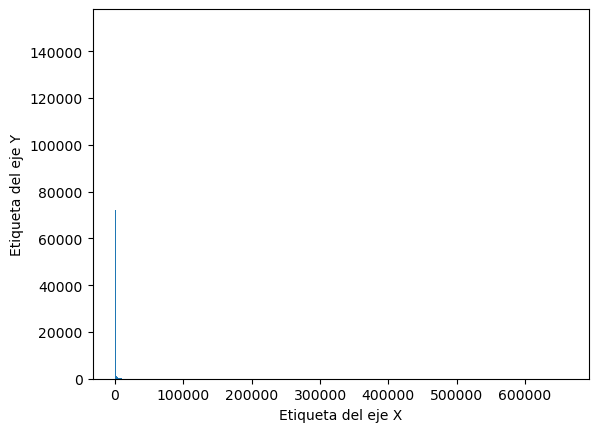

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
plt.hist(df['cs-bytes'], bins=1000)  # Puedes ajustar el número de bins según lo desees
plt.xlabel('Etiqueta del eje X')
plt.ylabel('Etiqueta del eje Y')
plt.show()

In [52]:
### Comienza el trabajo con los datos para CATEGORIZAR LOS CAMPOS

In [53]:

### Campo cs-uri-stem o campo del aplicativo a invocar


# PARA NORMALIZAR - Reemplazar 'dna\' o 'DNA\' al comienzo de 'cs-username' por una cadena vacía, insensible a mayúsculas/minúsculas 
df['cs-uri-stem'] = df['cs-uri-stem'].str.split('/').str[-1]
                                                    

# Agrupar , contar, ordenar y obtener los 19 mas frecuentes  y el 20 va a ser el resto 'otros'
top_20_csuristem = df.groupby('cs-uri-stem')['cs-uri-stem'].count().sort_values(ascending=False).head(20).index.tolist()
if '' in top_20_csuristem:
    top_20_csuristem.remove('')

# Elimina el último elemento de la lista si la lista no está vacía
if len(top_20_csuristem) == 20:
    top_20_csuristem.pop()
print ('top_20_csuristem:' , len(top_20_csuristem))

with open('modelo\lista_categorias_csuristem.csv', 'w') as archivo:
    for elemento in top_20_csuristem:
        archivo.write("%s\n" % elemento)

### Campo cs-username
# PARA NORMALIZAR - Reemplazar 'dna\' o 'DNA\' al comienzo de 'cs-username' por una cadena vacía, insensible a mayúsculas/minúsculas 
df['cs-username'] = df['cs-username'].str.replace('^(?i)dna\\\\', '', regex=True)

# Agrupar por 'cs-username', contar, ordenar y obtener los 19 mas frecuentes  y el 20 va a ser el resto 'otros'
top_20_usernames = df.groupby('cs-username')['cs-username'].count().sort_values(ascending=False).head(19).index.tolist()


with open('modelo\lista_categorias_csusername.csv', 'w') as archivo:
    for elemento in top_20_usernames:
        archivo.write("%s\n" % elemento)
print ('top_20_usernames:' , len(top_20_usernames))


top_20_csuristem: 19
top_20_usernames: 19


In [54]:
# DIRECCION Ip o c
# Función para buscar los elementos comunes
def procesador_ip(ip):
    octetos = ip.split('.')
    # lo pasamos a 3 digitos llenando de 0
    octetos = [octeto.zfill(3) for octeto in octetos]
    primer_octeto = int(octetos[0])
    segundo_octeto = int(octetos[1])
    
    # Comprueba los dos primeros octetos
    if primer_octeto == 172 and segundo_octeto == 20:
        # Si los dos primeros octetos son 172 y 20, respectivamente, toma solo los dos primeros
        return ''.join(octetos[:2])
    else:
        # De lo contrario, tom los tres primeros octetos
        return ''.join(octetos[:2]) 
# Aplicar la función a la columna ip_address
df['ip_concat'] = df['c-ip'].apply(procesador_ip)

top_20_IP = df.groupby('ip_concat')['ip_concat'].count().sort_values(ascending=False).head(19).index.tolist()

with open('modelo\lista_categorias_ipclientes.csv', 'w') as archivo:
    for elemento in top_20_IP:
        archivo.write("%s\n" % elemento)       

In [55]:
### Campo cs-bytes categorizacion
import joblib
# Suponiendo que df es tu DataFrame y cs-byte es la columna de interés
# Asegúrate de que cs-byte sea numérico
df['cs-bytes'] = pd.to_numeric(df['cs-bytes'], errors='coerce').fillna(0)

# Escalamos los datos para mejorar la convergencia del GMM
scaler = StandardScaler()
cs_bytes_scaled = scaler.fit_transform(df[['cs-bytes']])

#Calculamos la Gaussiana y el numero optimo de categorias
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(cs_bytes_scaled) for n in n_components]

# Calcular el BIC para cada modelo
bic = [m.bic(cs_bytes_scaled) for m in models]

# Encontrar el número óptimo de componentes gaussianos
optimal_n_components = n_components[np.argmin(bic)]
print("Optimo " + str(optimal_n_components))

# En nuestro estudio el optimo = 16 y por eso lo ponemos a fuego
optimal_n_components = 16

gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='full', random_state=0)
gmm.fit(cs_bytes_scaled)

# Clasificar cada muestra en uno de los componentes gaussianos
df['cs-bytes-category'] = gmm.predict(cs_bytes_scaled)


# Guardar el modelo entrenado en un archivo
joblib.dump(gmm, 'modelo\gmm_csbyte.pkl')
joblib.dump(scaler, 'modelo\gmmscaler_csbyte.pkl')


Optimo 19


['modelo\\gmmscaler_csbyte.pkl']

In [56]:
### Campo sc-bytes categorizacion
import joblib

# Asegurar de que cs-byte sea numérico
df['sc-bytes'] = pd.to_numeric(df['sc-bytes'], errors='coerce').fillna(0)

# Escalamos los datos para mejorar la convergencia del GMM
scaler = StandardScaler()
sc_bytes_scaled = scaler.fit_transform(df[['sc-bytes']])

#Calculamos la Gaussiana y el numero optimo de categorias
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(sc_bytes_scaled) for n in n_components]

# Calcular el BIC para cada modelo
bic = [m.bic(sc_bytes_scaled) for m in models]

# Encontrar el número óptimo de componentes gaussianos
optimal_n_components = n_components[np.argmin(bic)]
print("Optimo " + str(optimal_n_components))

# En nuestro estudio el optimo = 19 y por eso lo ponemos a fuego
optimal_n_components = 18

gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='full', random_state=0)
gmm.fit(sc_bytes_scaled)

# Clasificar cada muestra en uno de los componentes gaussianos
df['sc-bytes-category'] = gmm.predict(sc_bytes_scaled)

joblib.dump(gmm, 'modelo\gmm_scbyte.pkl')
joblib.dump(scaler, 'modelo\gmmscaler_scbyte.pkl')



Optimo 19


['modelo\\gmmscaler_scbyte.pkl']

In [57]:
### Campo time-taken categorizacion
import joblib
# Suponiendo que df es tu DataFrame y cs-byte es la columna de interés
# Asegúrate de que cs-byte sea numérico
df['time-taken'] = pd.to_numeric(df['time-taken'], errors='coerce').fillna(0)

# Escalamos los datos para mejorar la convergencia del GMM
scaler = StandardScaler()
time_taken_scaled = scaler.fit_transform(df[['time-taken']])

#Calculamos la Gaussiana y el numero optimo de categorias
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(time_taken_scaled) for n in n_components]

# Calcular el BIC para cada modelo
bic = [m.bic(time_taken_scaled) for m in models]

# Encontrar el número óptimo de componentes gaussianos
optimal_n_components = n_components[np.argmin(bic)]
print("Optimo " + str(optimal_n_components))

# En nuestro estudio el optimo = 19 y por eso lo ponemos a fuego
optimal_n_components = 19

gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='full', random_state=0)
gmm.fit(time_taken_scaled)

# Clasificar cada muestra en uno de los componentes gaussianos
df['time-taken-cat'] = gmm.predict(time_taken_scaled)

# Guardar el modelo entrenado en un archivo
joblib.dump(gmm, 'modelo\gmm_timetaken.pkl')
joblib.dump(scaler, 'modelo\gmmscaler_timetaken.pkl')



Optimo 19


['modelo\\gmmscaler_timetaken.pkl']

In [58]:
# Genero nuevo dataframe convirtiendo cada fila incial categorizada en la nueva estructura

In [59]:
### Campo time
def categorizar_por_hora(time):
    hora = int(time.split(':')[0])  # Convertimos a entero el primer elemento luego de hacer split por ':'
    H = np.zeros(4, dtype=bool)
    
    # Ahora, categorizamos según los rangos definidos
    if (6 <= hora < 9) :
        H[0] = True
    elif 9 <= hora < 19:
        H[1] = True
    elif hora >= 23 or hora < 6:
        H[2] = True
    else: # (19 <= hora < 23)
        H[3] = True
    return (H) 

### Campo sc-status 
# Crear la nueva columna 'status-cat' basada en la condición
def buscoE(statuscat):
   E = np.zeros(3, dtype=bool)
   if (statuscat == '200') :
       E[0] = True
   elif (statuscat == '401'):
       E[1] = True
   else :
       E[2] = True
   return (E) 
    
def buscolista (elemento,lista):
    try:
        indice = lista.index(elemento)
        return indice
    except ValueError:
        return -1

def generoValor(elemento, lista, cantelementos ):
   P = np.zeros(cantelementos, dtype=bool)
   indice = buscolista(elemento, lista) 
   if (indice == -1) :
       P[cantelementos-1] = True
   else :
       P[indice] = True
   return (P) 


with open('modelo\lista_categorias_csuristem.csv', 'r') as archivo:
    top_20_csuristem = [linea.strip() for linea in archivo.readlines() if linea.strip()]

with open('modelo\lista_categorias_csusername.csv', 'r') as archivo:
    top_20_usernames = [linea.strip() for linea in archivo.readlines() if linea.strip()]

with open('modelo\lista_categorias_ipclientes.csv', 'r') as archivo:
    top_20_IP = [linea.strip() for linea in archivo.readlines() if linea.strip()]
    
categoria_csmethod = ['GET','POST']

df['cs-uri-stem'] = df['cs-uri-stem'].str.split('/').str[-1]
df['cs-username'] = df['cs-username'].str.replace('^(?i)dna\\\\', '', regex=True)

### Campo cs-bytes categorizacion
import joblib
#Cargo modelo guardado
gmm = joblib.load('modelo\gmm_csbyte.pkl')
scaler = joblib.load('modelo\gmmscaler_csbyte.pkl')

df['cs-bytes'] = pd.to_numeric(df['cs-bytes'], errors='coerce').fillna(0)

cs_bytes_scaled = scaler.transform(df[['cs-bytes']])
df['cs-bytes-category'] = gmm.predict(cs_bytes_scaled)

### Campo sc-bytes categorizacion
import joblib
#Cargo modelo guardado
gmm = joblib.load('modelo\gmm_scbyte.pkl')
scaler= joblib.load('modelo\gmmscaler_scbyte.pkl')

df['sc-bytes'] = pd.to_numeric(df['sc-bytes'], errors='coerce').fillna(0)

sc_bytes_scaled = scaler.transform(df[['sc-bytes']])
df['sc-bytes-category'] = gmm.predict(sc_bytes_scaled)

### Campo time-taken 
import joblib
#Cargo modelo guardado

gmm = joblib.load('modelo\gmm_timetaken.pkl')
scaler= joblib.load('modelo\gmmscaler_timetaken.pkl')


def buscoV (logp):
   p  = np.zeros(3, dtype=bool)
   if logp.upper() == 'GET':
        p[0] = True
   elif logp.upper() == 'POST':
        p[1] = True
   else:
        p[2] = True
    
   return p

In [60]:
# Lista de nuevas filas
 #V=Get o post u otro
    #P= Programa ejecutado
    #U= Usuario
    #I= IPCliente
    #C= CsByte recibidos
    #S= ScByte enviados.
    #H= Hora (4 posibles)
    #T= Time-Tiken (tiempo del a consulta)
    #E= Codigo de error
new_vector = []

# Iterar sobre cada fila del DataFrame original
for index, row in df.iterrows():
       
   
    V_Vacio = np.zeros(3, dtype=bool)
    P_Vacio = np.zeros(20, dtype=bool)
    U_Vacio = np.zeros(20, dtype=bool)
    I_Vacio = np.zeros(20, dtype=bool)
    C_Vacio = np.zeros(16, dtype=bool)
    S_Vacio = np.zeros(18, dtype=bool)
    H_Vacio = np.zeros(4, dtype=bool)
    T_Vacio = np.zeros(19, dtype=bool)
    E_Vacio = np.zeros(3, dtype=bool)

    V = buscoV (row['cs-method'])
    P = generoValor(row['cs-uri-stem'], top_20_csuristem, 20)
    I = generoValor(procesador_ip(row['c-ip']), top_20_IP, 20)
    U = generoValor(row['cs-username'], top_20_usernames, 20)
    E = buscoE(row['sc-status'])
    H = categorizar_por_hora(row['time'])
    S = np.zeros(18, dtype=bool)
    S[row['sc-bytes-category']] = True
    C = np.zeros(16, dtype=bool)
    C[row['cs-bytes-category']] = True
    T = np.zeros(19, dtype=bool)
    T[row['time-taken-cat']-1] = True
    
    # Convertir las matrices booleanas a cadenas
    V_Vacio_str = ''.join(map(str, V_Vacio.astype(int)))
    P_Vacio_str = ''.join(map(str, U_Vacio.astype(int)))
    U_Vacio_str = ''.join(map(str, U_Vacio.astype(int)))
    I_Vacio_str = ''.join(map(str, I_Vacio.astype(int)))
    C_Vacio_str = ''.join(map(str, C_Vacio.astype(int)))
    S_Vacio_str = ''.join(map(str, S_Vacio.astype(int)))
    H_Vacio_str = ''.join(map(str, H_Vacio.astype(int)))
    T_Vacio_str = ''.join(map(str, T_Vacio.astype(int)))
    E_Vacio_str = ''.join(map(str, E_Vacio.astype(int)))

    # Concatenar todas las cadenas
    NodoAplicacion = np.concatenate((P, V,  U_Vacio, I_Vacio , C_Vacio,S_Vacio,H_Vacio, T_Vacio, E_Vacio))
       
    # P*20 + V * 3 + U*20 + I*20 +C*10 + H*4 + T*10 + E*3   
    NodoIpCliente =  np.concatenate((P_Vacio, V_Vacio,  U_Vacio, I , C_Vacio,S_Vacio,H_Vacio, T_Vacio, E_Vacio))  
    # P*20 + V * 3 + U*20 + I*20 +C*10 + H*4 + T*10 + E*3   
    NodoUsuario   = np.concatenate((P_Vacio, V_Vacio,  U, I_Vacio , C_Vacio,S_Vacio,H_Vacio, T_Vacio, E_Vacio)) 
    # P*20 + V * 3 + U*20 + I*20 +C*10 + H*4 + T*10 + E*3   
    NodoConexion  =  np.concatenate((P_Vacio,  V_Vacio,  U_Vacio, I_Vacio , C , S , H , T , E)) 
    # Crear tres nuevas filas con cada Arista

    #AristaTipo1  = '001' + NodoConexion + NodoUsuario
    A1 = np.zeros(3, dtype=bool)
    A1[2] = True
   
    Arista1  = np.concatenate((A1 , NodoConexion , NodoUsuario))
    #print (A1)
    #AristaTipo2  = '010'
    A2 = np.zeros(3, dtype=bool)
    A2[1] = True
   
    Arista2  = np.concatenate((A2 , NodoConexion , NodoAplicacion))
    #AristaTipo3  = '100'
    A3 = np.zeros(3, dtype=bool)
    A3 [0] = True
    
    Arista3  = np.concatenate((A3, NodoConexion , NodoIpCliente))
    
   
    new_vector.append(Arista1)
    new_vector.append(Arista2)
    new_vector.append(Arista3)
    
    #if index >= 10000:
     #   break
print (len(Arista1), len(Arista2), len(Arista3))

249 249 249


In [61]:
# convierte  a una estructura de bits
def string_a_lista(cadena):
    return [int(char) for char in cadena]

# Convertir cada cadena en una lista de enteros y luego en un tensor
tensores = [torch.tensor(string_a_lista(cadena)) for cadena in new_vector]

# Concatenar los tensores en una sola dimensión
tensor_concatenado = torch.stack(tensores)

print(tensor_concatenado)

tensor([[0, 0, 1,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 1,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]])


In [62]:
from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    tensor_concatenado, test_size=0.15, random_state=42)

print (x_normal_train)
x_normal_train = np.array(x_normal_train)

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]])


In [63]:
### MODELADO 


In [64]:

import torch
import torch.nn as nn
import torch.optim as optim

class BifurcatedAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim, encoding_dim2, decoder_dim2 ,decoder_dim3, output_dim1, output_dim2, output_dim3):
        super(BifurcatedAutoencoder, self).__init__()
        
        # Encoder inicial
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.Sigmoid()
        )
        

        #  Encoder nivel 2
        self.encoder2 = nn.Sequential(
            nn.Linear(encoding_dim, encoding_dim2),
            nn.Sigmoid()
        )

        # Decoder Salida 1
        self.decoder1 = nn.Sequential(
            nn.Linear(encoding_dim2, output_dim1),
            nn.Softmax(dim=1)
        )
        
        # Decoder a siguiente paralelo 2
        self.decoder2 = nn.Sequential(
            nn.Linear(encoding_dim2, decoder_dim2),
            nn.Sigmoid()
        )
                
        # Decoder 2 hacia salida paralelo 2
        self.decoder2a = nn.Sequential(
            nn.Linear(decoder_dim2, output_dim2),
            nn.Sigmoid()
            #nn.ReLU(True)
        )
        # Decoder a siguiente paralelo 3
        self.decoder3 = nn.Sequential(
            nn.Linear(encoding_dim2, decoder_dim3),
            nn.Sigmoid()
        )
        # Decoder 2 hacia salida paralelo 3
        self.decoder3a = nn.Sequential(
            nn.Linear(decoder_dim3, output_dim3),
            nn.Sigmoid()
            #nn.ReLU(True)
        )

    
    def forward(self, x):
        encoded = self.encoder(x)
        encoded2 = self.encoder2(encoded)
        output_dim1 = self.decoder1(encoded2)
        decoded2 = self.decoder2(encoded2)
        output_dim2 = self.decoder2a(decoded2)
        decoded3 = self.decoder3(encoded2)
        output_dim3 = self.decoder3a(decoded3)
        return output_dim1, output_dim2,output_dim3 ,torch.cat((output_dim1, output_dim2,output_dim3), dim=1)

# Dimensiones ejemplo
input_dim = 249  # Dimensión del vector de entrada
encoding_dim = 180 # Dimensión del espacio latente (codificado)
encoding_dim2 = 70 
decoder_dim2 = 100
decoder_dim3 = 100
output_dim1 = 3  # Dimensiones de las partes de salida
output_dim2 = 123
output_dim3 = 123

# Crear el modelo
model = BifurcatedAutoencoder(input_dim, encoding_dim, encoding_dim2 ,decoder_dim2, decoder_dim3, output_dim1, output_dim2, output_dim3)

# Imprimir el modelo para ver su estructura
print(model)


BifurcatedAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=249, out_features=180, bias=True)
    (1): Sigmoid()
  )
  (encoder2): Sequential(
    (0): Linear(in_features=180, out_features=70, bias=True)
    (1): Sigmoid()
  )
  (decoder1): Sequential(
    (0): Linear(in_features=70, out_features=3, bias=True)
    (1): Softmax(dim=1)
  )
  (decoder2): Sequential(
    (0): Linear(in_features=70, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (decoder2a): Sequential(
    (0): Linear(in_features=100, out_features=123, bias=True)
    (1): Sigmoid()
  )
  (decoder3): Sequential(
    (0): Linear(in_features=70, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (decoder3a): Sequential(
    (0): Linear(in_features=100, out_features=123, bias=True)
    (1): Sigmoid()
  )
)


In [65]:
#modelo 
for name, param in model.named_parameters():
    print(name, param.shape)

encoder.0.weight torch.Size([180, 249])
encoder.0.bias torch.Size([180])
encoder2.0.weight torch.Size([70, 180])
encoder2.0.bias torch.Size([70])
decoder1.0.weight torch.Size([3, 70])
decoder1.0.bias torch.Size([3])
decoder2.0.weight torch.Size([100, 70])
decoder2.0.bias torch.Size([100])
decoder2a.0.weight torch.Size([123, 100])
decoder2a.0.bias torch.Size([123])
decoder3.0.weight torch.Size([100, 70])
decoder3.0.bias torch.Size([100])
decoder3a.0.weight torch.Size([123, 100])
decoder3a.0.bias torch.Size([123])


In [66]:

from torch.utils.data import DataLoader, TensorDataset

# Convert numpy arrays to PyTorch tensors and move them to the appropriate device
x_normal_train_tensor = torch.tensor(x_normal_train).float().to(device)

# Create DataLoader for batch processing
train_data = TensorDataset(x_normal_train_tensor, x_normal_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

Epoch [1/100], Loss: 2.069747552013723e-06
Epoch [2/100], Loss: 8.27932467473147e-07
Epoch [3/100], Loss: 4.925881967210444e-06
Epoch [4/100], Loss: 0.00040175937465392053
Epoch [5/100], Loss: 3.4071739207774954e-08
Epoch [6/100], Loss: 1.447586726044392e-07
Epoch [7/100], Loss: 4.974739731267164e-09
Epoch [8/100], Loss: 3.945676851913049e-08
Epoch [9/100], Loss: 2.5292548055944053e-09
Epoch [10/100], Loss: 4.190119362590394e-09
Epoch [11/100], Loss: 3.944788939946875e-09
Epoch [12/100], Loss: 6.016124043384252e-09
Epoch [13/100], Loss: 4.33268576571777e-09
Epoch [14/100], Loss: 1.5667793729079449e-09
Epoch [15/100], Loss: 1.3332505099938885e-09
Epoch [16/100], Loss: 1.0954894236192558e-07
Epoch [17/100], Loss: 9.310088810998707e-10
Epoch [18/100], Loss: 3.689647198878987e-10
Epoch [19/100], Loss: 2.6920428108923034e-09
Epoch [20/100], Loss: 7.574489924166983e-10
Epoch [21/100], Loss: 6.2346146023628535e-09
Epoch [22/100], Loss: 1.0043771370149557e-09
Epoch [23/100], Loss: 4.7365183997

AttributeError: Line2D.set() got an unexpected keyword argument 'figsize'

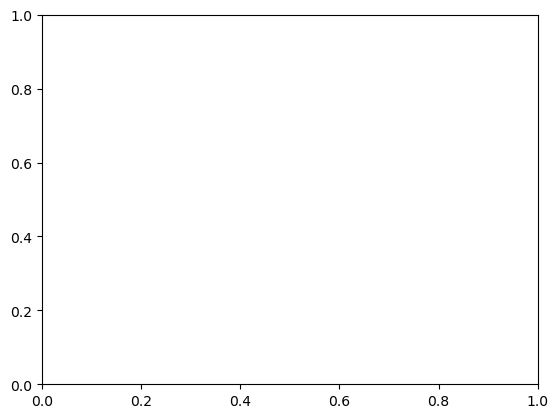

In [67]:
#Para entrenar este modelo, necesitarás definir una función de pérdida y un optimizador. Aquí utilizaremos el error cuadrático medio
# como función de pérdida y el optimizador Adam
train_data = TensorDataset(x_normal_train_tensor, x_normal_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
#optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
inputs = train_loader
losses2 = []
losstotal = 0
# inputs: Tensor de entradas
num_epochs = 100
minimoLoss = 1
# Un ciclo de entrenamiento
for epoch2 in range(num_epochs):
    for inputs, _ in train_loader:
        optimizer.zero_grad()
        output1, output2,output3, outputs = model(inputs)
        loss = criterion(outputs, inputs)  # MSE entre entrada y salida reconstruida
        loss.backward()
        optimizer.step()
    if loss.item() <= minimoLoss: # Guardo el modelo con menor error.
        minimoLoss = loss.item()
        torch.save(model.state_dict(), 'modelo\modelo_entrenado_errorsimple_minV66_Adam.pth')
    if epoch2 % 20 == 0: # guardo el modelo general cada 20 epocs (se sobreescribe)
        torch.save(model.state_dict(), 'modelo\modelo_entrenado_errorsimplev66_Adam.pth')
    print(f'Epoch [{epoch2+1}/{num_epochs}], Loss: {loss.item()}')
    losses2.append(loss.item())
    losstotal = losstotal + loss.item()
#Guardo modelo.
torch.save(model.state_dict(), 'modelo\modelo_entrenado_errorsimplev66_Adam.pth')
    # Graficar la pérdida en función de las épocas
plt.plot(range(1, num_epochs+1), losses2, label='Loss' , figsize=(10, 6))
plt.xlabel('epoc')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

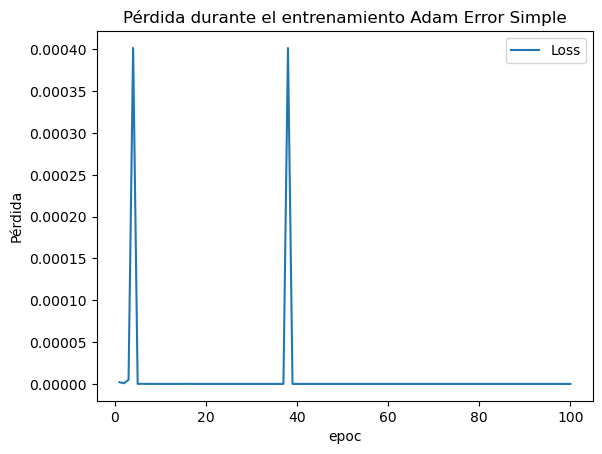

In [69]:
plt.plot(range(1, num_epochs+1), losses2, label='Loss' )
plt.xlabel('epoc')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento Adam Error Simple')
plt.legend()

In [29]:
#Para entrenar este modelo, necesitarás definir una función de pérdida y un optimizador. Aquí utilizaremos el error cuadrático medio
# como función de pérdida y el optimizador Adam
import matplotlib.pyplot as plt
train_data = TensorDataset(x_normal_train_tensor, x_normal_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=1e-3)
#optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
inputs = train_loader
losses = [] # Para graficar la loss

# inputs: Tensor de entradas
# targets1, targets2, targets3: Tres partes del tensor objetivo
num_epochs = 100
minimo_loss = 1
# Un ciclo de entrenamiento
for epoch in range(num_epochs):
    for inputs, _ in train_loader:
        optimizer.zero_grad()
        outputs1, outputs2, outputs3 ,outTodo = model(inputs)  # Separar las salidas en partes individuales
        #print (outputs1, inputs[:, :output_dim1])
        loss1 = criterion(outputs1, inputs[:, :output_dim1])  # Calcular el error para la primera parte de la salida
        loss2 = criterion(outputs2, inputs[:, output_dim1:output_dim1+output_dim2])  # Calcular el error para la segunda parte de la salida
        loss3 = criterion(outputs3, inputs[:, output_dim1+output_dim2:])  # Calcular el error para la tercera parte de la salida
        total_loss = loss1 + loss2 + loss3  # Sumar los errores individuales
        total_loss.backward()
        optimizer.step()
    
    if total_loss.item() <= minimoLoss: # Guardo el modelo con menor error.
        minimoLoss = total_loss.item()
        torch.save(model.state_dict(), 'modelo\modelo_entrenado_errorcompuesto_minV66_Adam.pth')
    if epoch % 20 == 0: # guardo el modelo general cada 20 epocs (se sobreescribe)
        torch.save(model.state_dict(), 'modelo\modelo_entrenado_errorcompuestoV66_Adam.pth')
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss.item()}, Loss1: {loss1.item()},Loss2: {loss2.item()},Loss3: {loss3.item()}')
    losses.append(total_loss.item())
#Guardo modelo.
torch.save(model.state_dict(), 'modelo\modelo_entrenado_errorcompuestoV66_Adam.pth')
# Graficar la pérdida en función de las épocas
plt.plot(range(1, num_epochs+1), losses, label='Loss')
plt.xlabel('epoc')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

Epoch [1/100], Loss: 4.685855037322995e-10, Loss1: 1.3795901270333144e-12,Loss2: 2.1521863458051627e-10,Loss3: 2.5198726438802055e-10
Epoch [2/100], Loss: 4.3244643421758155e-09, Loss1: 2.406200781158996e-13,Loss2: 4.2833305791134535e-09,Loss3: 4.089328875522824e-11
Epoch [3/100], Loss: 5.863409202611081e-10, Loss1: 3.689728373095641e-13,Loss2: 1.1337008415379657e-10,Loss3: 4.726018465461834e-10
Epoch [4/100], Loss: 8.212333035828578e-10, Loss1: 2.1781182760194362e-11,Loss2: 3.500260359334817e-10,Loss3: 4.49426107440587e-10
Epoch [5/100], Loss: 2.121806619292954e-10, Loss1: 1.398736486878105e-12,Loss2: 9.142055168442909e-11,Loss3: 1.1936138188950451e-10
Epoch [6/100], Loss: 9.331118100419644e-10, Loss1: 5.742809873476862e-12,Loss2: 1.1120855625268433e-10,Loss3: 8.161604725387406e-10
Epoch [7/100], Loss: 2.1000579053520596e-09, Loss1: 4.835606567943351e-11,Loss2: 7.145341540670813e-10,Loss3: 1.337167820913976e-09
Epoch [8/100], Loss: 5.908087907791071e-10, Loss1: 4.332047776056669e-10,L

KeyboardInterrupt: 

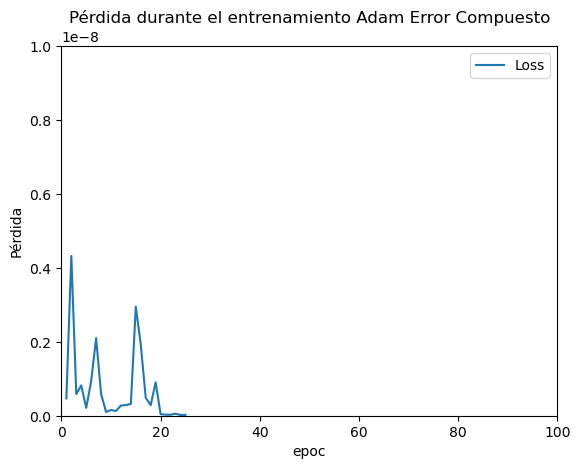

In [37]:
plt.plot(range(1, num_epochs+1), losses, label='Loss')

plt.xlabel('epoc')
plt.ylim(0, 0.00000001)
plt.xlim(0, 100)
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento Adam Error Compuesto')
plt.legend()